# King County Housing Data

# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
pd.set_option('display.max_columns', None)
%matplotlib inline

df_train = pd.read_csv("kc_house_data_train.csv")

df_train.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [2]:
df_train.columns.values

array(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'], dtype=object)

In [3]:
cols = ['price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15']


df_train = df_train[cols]

In [4]:
df_train.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64



No null values. Will make it easier to work with. 

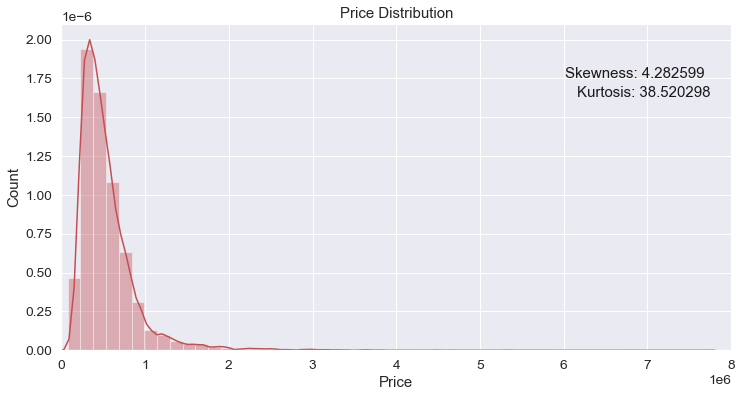

In [89]:
#histogram
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(df_train['price'], bins=50, color = 'r')
ax.set(xlim=[0, 8000000], xlabel='Price', ylabel='Count',
       title='Price Distribution')
ax.annotate("Skewness: %f" % (df_train['price']).skew(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.96, 0.87), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
ax.annotate("Kurtosis: %f" % (df_train['price']).kurt(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.81), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
plt.savefig('PNG/price_distribution.png', bbox_inches = 'tight',pad_inches = 0)

In [6]:
print("Skewness: %f" % (df_train['price']).skew())
print("Kurtosis: %f" % (df_train['price']).kurt())

Skewness: 4.282599
Kurtosis: 38.520298


Price is not normally distributed. Going to try a natural log transformation to see if it helps

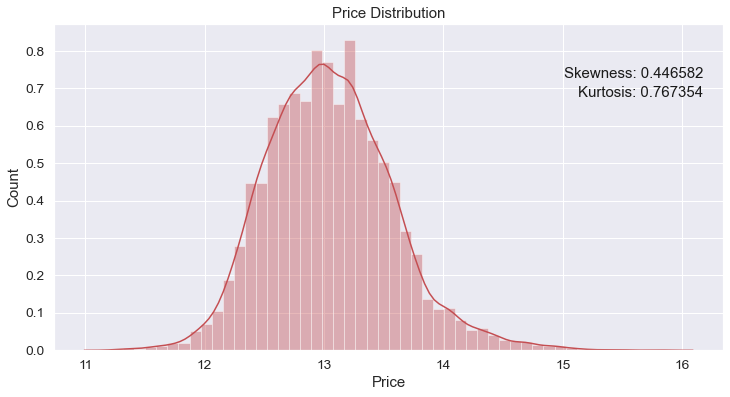

In [90]:
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(np.log(df_train['price']), bins=50, color = 'r')
ax.set( xlabel='Price', ylabel='Count',
       title='Price Distribution')
ax.annotate("Skewness: %f" % (np.log(df_train['price'])).skew(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.87), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
ax.annotate("Kurtosis: %f" % (np.log(df_train['price'])).kurt(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.81), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
plt.savefig('PNG/log_price_distribution.png', bbox_inches = 'tight',pad_inches = 0)

In [8]:
print("Skewness: %f" % (np.log(df_train['price'])).skew())
print("Kurtosis: %f" % (np.log(df_train['price'])).kurt())

Skewness: 0.446582
Kurtosis: 0.767354


Much better. 

In [9]:
df_train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [155]:
df_train[df_train['bedrooms'].eq(33)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old
8597,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2015


There are many anomalies, including : bedrooms (max), sqft_living (max), sqft_lot (max), grade (max), sqft_above (max), sqft_basement (max), sqft_living15 (max), sqft_lot15 (max)

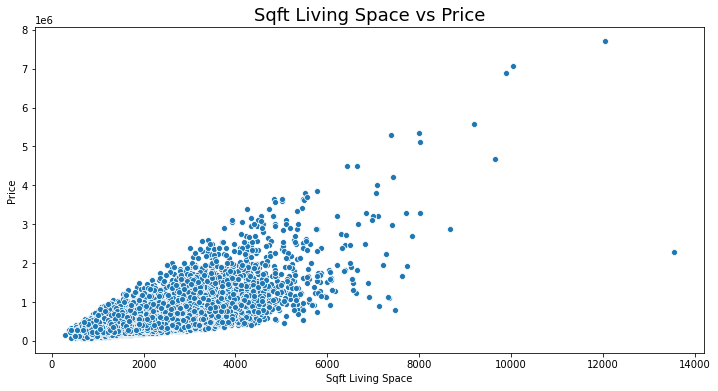

In [10]:
var = 'sqft_living'
fig, axe = plt.subplots(figsize = (12,6))
sns.scatterplot(data = df_train, x = df_train[var], y = df_train['price'])
axe.set_title('Sqft Living Space vs Price', fontdict = {'fontsize' : 18})
axe.set_ylabel('Price')
axe.set_xlabel('Sqft Living Space')
plt.show()

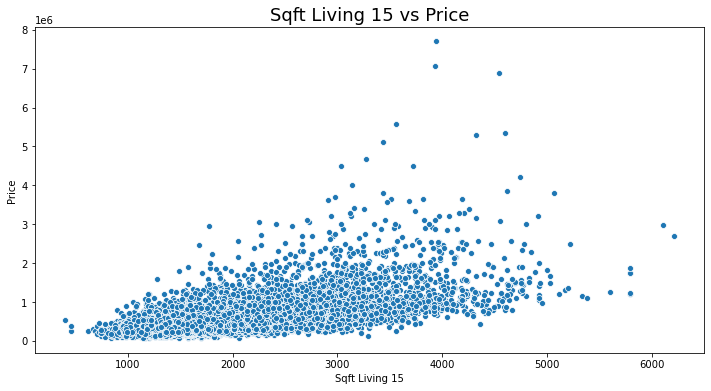

In [11]:
var = 'sqft_living15'
fig, axe = plt.subplots(figsize = (12,6))
sns.scatterplot(data = df_train, x = df_train[var], y = df_train['price'])
axe.set_title('Sqft Living 15 vs Price', fontdict = {'fontsize' : 18})
axe.set_ylabel('Price')
axe.set_xlabel('Sqft Living 15')
plt.show()

There is a clear relationship between price and living space. 

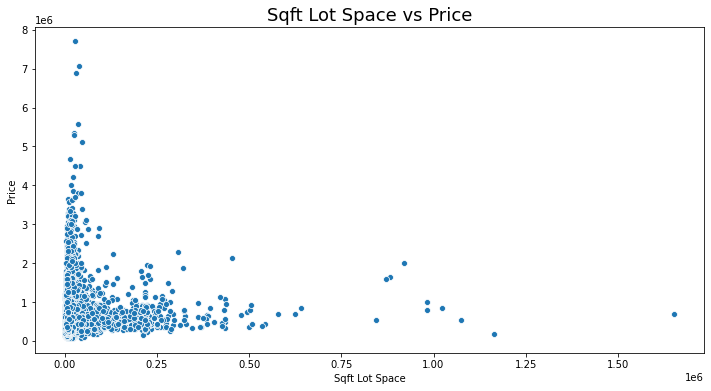

In [12]:
var = 'sqft_lot'
fig, axe = plt.subplots(figsize = (12,6))
sns.scatterplot(data = df_train, x = df_train[var], y = df_train['price'])
axe.set_title('Sqft Lot Space vs Price', fontdict = {'fontsize' : 18})
axe.set_ylabel('Price')
axe.set_xlabel('Sqft Lot Space')
plt.show()

There doesn't seem to be the same relationship for the lot size. 

Let's try this for all of them at the same time. 

In [13]:
df_train.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

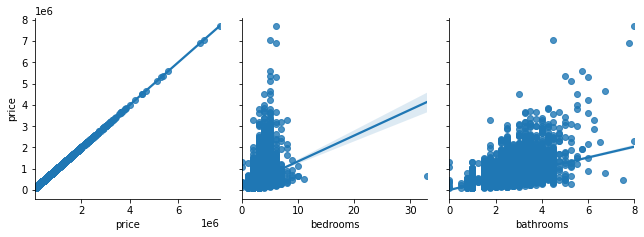

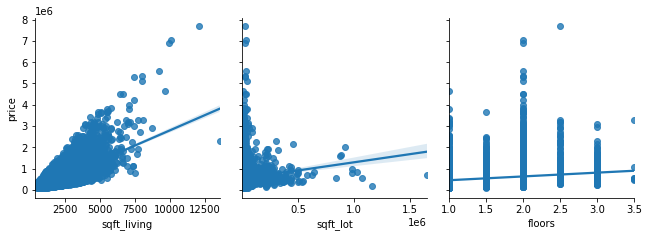

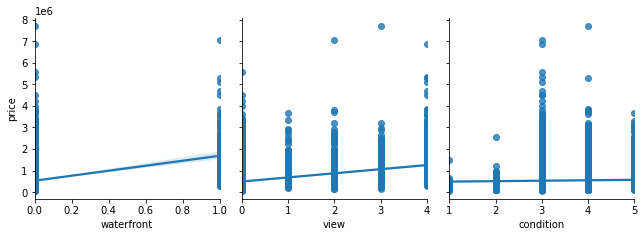

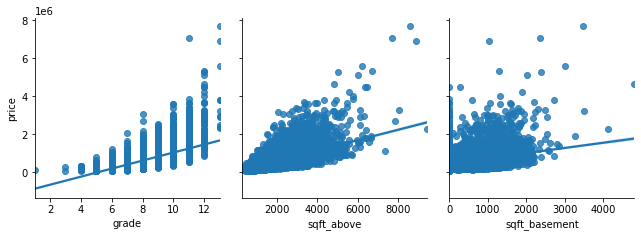

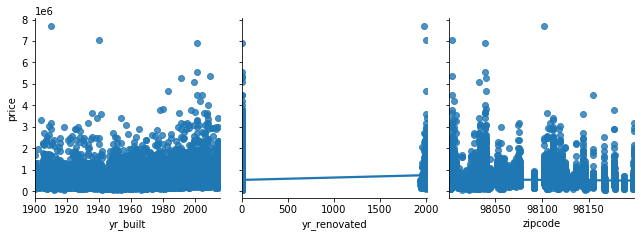

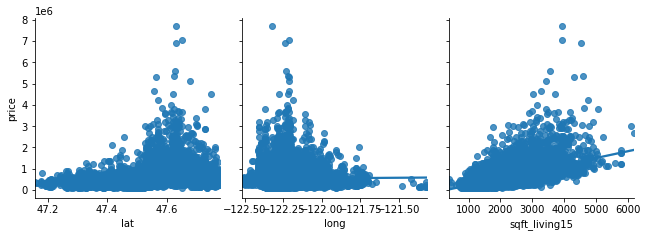

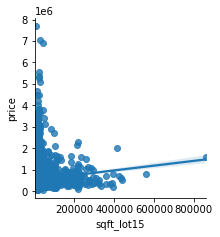

In [14]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

n = 3
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

for i in row_groups:
    pp = sns.pairplot(data=df_train, y_vars=['price'],x_vars=i, kind="reg", height=3)

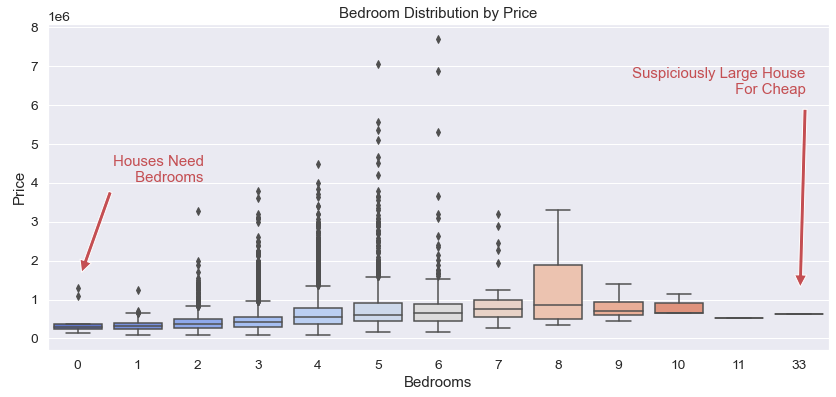

In [142]:
var = 'bedrooms'
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(x=var, y="price", data=df_train, palette='coolwarm')
ax.annotate('Suspiciously Large House\n For Cheap',color = 'r',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.87), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('Houses Need\n Bedrooms',color = 'r',
            xy=(80,120), xycoords='figure points',
            xytext=(.2, 0.6), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.set(xlabel='Bedrooms', ylabel='Price',title='Bedroom Distribution by Price')
plt.savefig('PNG/annotated_bedrooms_distribution.png', bbox_inches = 'tight',pad_inches = 0)

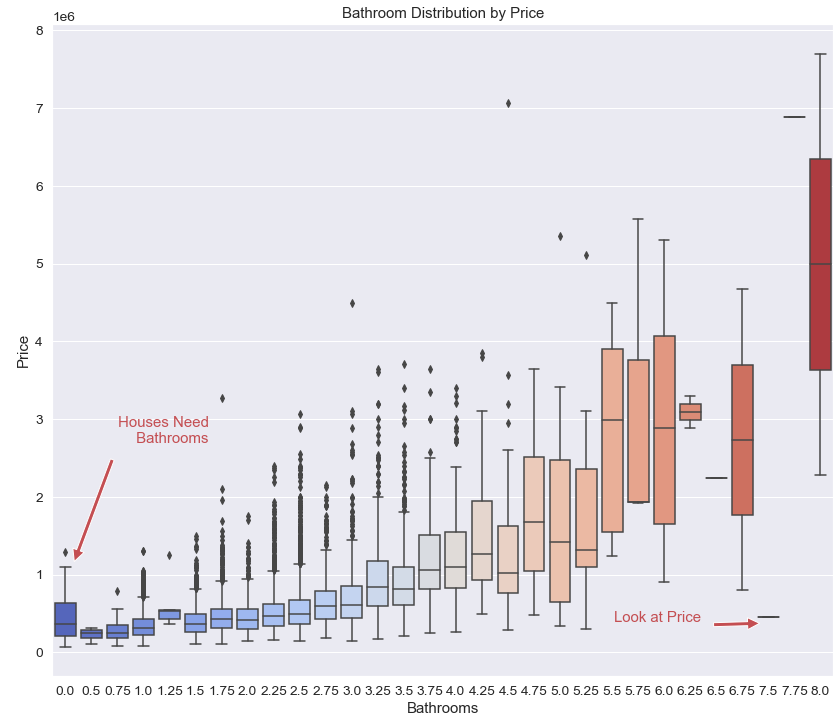

In [154]:
var = 'bathrooms'
fig, ax = plt.subplots(figsize=(14,12))
sns.boxplot(x=var, y="price", data=df_train, palette='coolwarm')
ax.annotate('Houses Need\n Bathrooms',color = 'r',
            xy=(70,150), xycoords='figure points',
            xytext=(.2, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.09),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('Look at Price',color = 'r',
            xy=(770,100), xycoords='figure points',
            xytext=(.83, 0.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.15),
            horizontalalignment='right', verticalalignment='top')
ax.set( xlabel='Bathrooms', ylabel='Price',
       title='Bathroom Distribution by Price')
plt.savefig('PNG/annotated_bathrooms_distribution.png', bbox_inches = 'tight',pad_inches = 0)

[(0.0, 5000000.0),
 Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Grade'),
 Text(0.5, 1.0, 'Grade vs Price')]

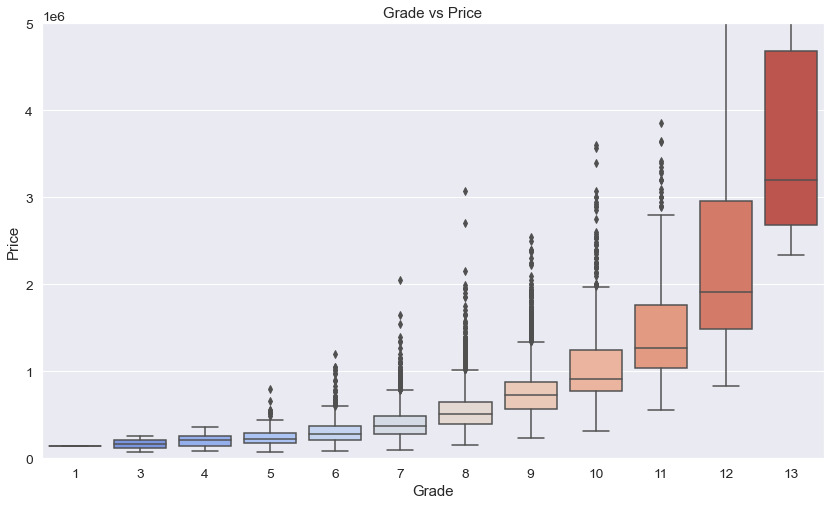

In [73]:
var = 'grade'
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(x=var, y="price", data=df_train, palette='coolwarm')
ax.set( xlabel='Grade', ylabel='Price',ylim = [0,5000000],
       title='Grade vs Price')

'ax.annotate("Skewness: %f" % (np.log(df_train[\'price\'])).skew(),color = \'k\',\n            xy=(800,130), xycoords=\'figure points\',\n            xytext=(.97, 0.87), textcoords=\'axes fraction\',\n            horizontalalignment=\'right\', verticalalignment=\'top\')\nax.annotate("Kurtosis: %f" % (np.log(df_train[\'price\'])).kurt(),color = \'k\',\n            xy=(800,130), xycoords=\'figure points\',\n            xytext=(.97, 0.81), textcoords=\'axes fraction\',\n            horizontalalignment=\'right\', verticalalignment=\'top\')'

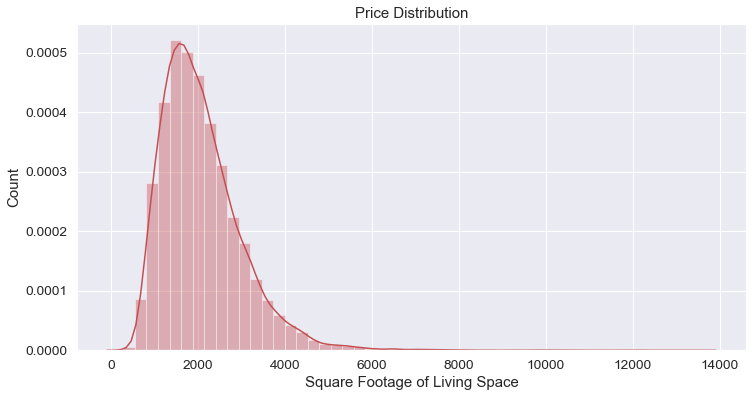

In [132]:
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(df_train['sqft_living'], bins=50, color = 'r')
ax.set( xlabel='Square Footage of Living Space', ylabel='Count',
       title='Price Distribution')
"""ax.annotate("Skewness: %f" % (np.log(df_train['price'])).skew(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.87), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
ax.annotate("Kurtosis: %f" % (np.log(df_train['price'])).kurt(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.81), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')"""
#plt.savefig('PNG/log_price_distribution.png', bbox_inches = 'tight',pad_inches = 0)

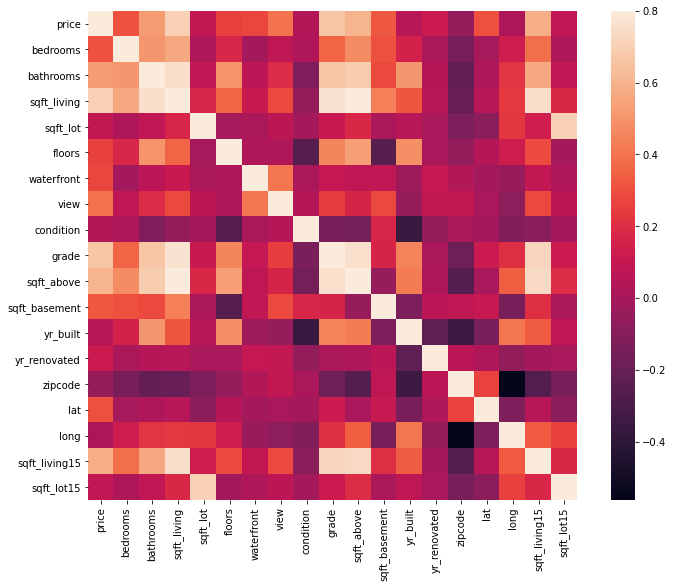

In [18]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

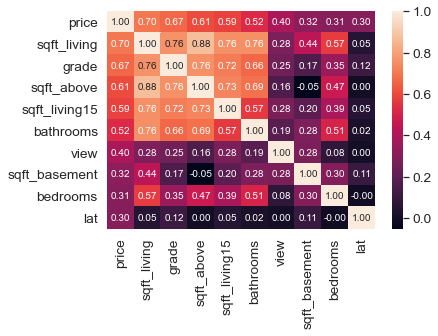

In [74]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
df_train['price'] = np.log(df_train['price'])
df_train['sqft_living'] = np.log(df_train['sqft_living'])
df_train['sqft_lot'] = np.log(df_train['sqft_lot'])
df_train['sqft_living15'] = np.log(df_train['sqft_living15'])
df_train['sqft_lot15'] = np.log(df_train['sqft_lot15'])

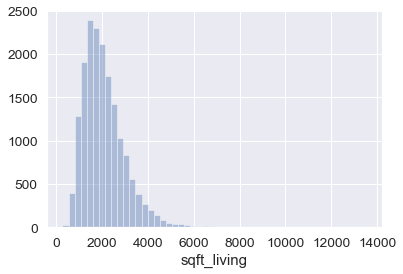

In [20]:
sns.distplot(df_train['sqft_living'], bins=50, kde=False)

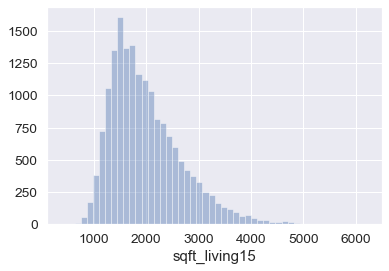

In [21]:
sns.distplot(df_train['sqft_living15'], bins=50, kde=False)

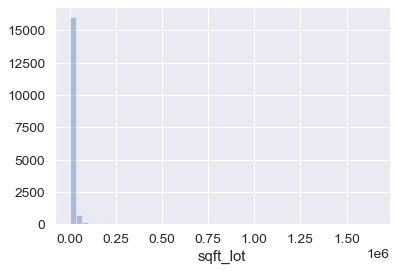

In [22]:
sns.distplot(df_train['sqft_lot'], bins=50, kde=False)

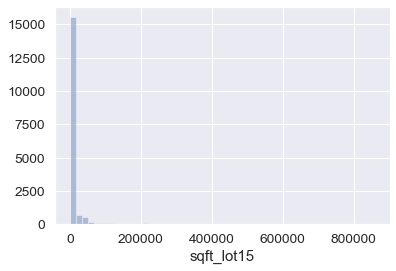

In [23]:
sns.distplot(df_train['sqft_lot15'], bins=50, kde=False)

# Data Cleaning

In [ ]:
df_train.describe(include= 'all')

In [ ]:
df_train[df_train['bedrooms'].eq(33)]

In [ ]:
df_train[df_train['sqft_living'].lt(8)].bedrooms.mean()

In [156]:
df_train[df_train['bedrooms'].eq(33)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old
8597,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2015


In [163]:
df_train.bedrooms.value_counts(ascending = True)

33       1
11       1
10       3
9        5
8       10
0       12
7       30
1      160
6      229
5     1283
2     2204
4     5488
3     7864
Name: bedrooms, dtype: int64

In [164]:
df_train.bathrooms.value_counts(ascending = True)

7.75       1
6.50       1
7.50       1
6.25       2
6.75       2
8.00       2
0.50       3
5.75       3
6.00       6
1.25       6
5.50       7
0.00       8
5.25      11
4.75      16
5.00      17
0.75      52
4.25      64
4.50      76
4.00     107
3.75     135
3.25     455
3.50     591
3.00     592
2.75     896
1.50    1168
2.00    1549
2.25    1666
1.75    2431
1.00    3100
2.50    4322
Name: bathrooms, dtype: int64

In [165]:
df_train[df_train['bedrooms'].eq(0)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old
483,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,2015
1120,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,2015
2430,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341,2015
3032,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,2015
3609,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,2015
5424,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,2015
6409,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,2015
9286,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,2015
10067,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,2015
10074,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,2015


# Feature Engineering

47.609862, -122.342056 are the coordinates of Pike Place

Counting Pike Place as the proxy for city center.

In [ ]:
from geopy.distance import geodesic
pike_place = (47.609862, -122.342056)
df_train['coords'] = tuple(zip(df_train['lat'],df_train['long']))
df_train['distance_from_pike'] = df_train['coords'].apply(lambda x: geodesic(pike_place,x))
df_train['distance_from_pike'] = df_train['distance_from_pike'].astype(str).str[:-3].astype(float)

In [27]:
df_train['yr_renovated'].value_counts()

0       16564
2014       71
2007       32
2005       32
2000       31
        ...  
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

In [28]:
df_train['yr_old'] = 2015 - df_train['yr_renovated']

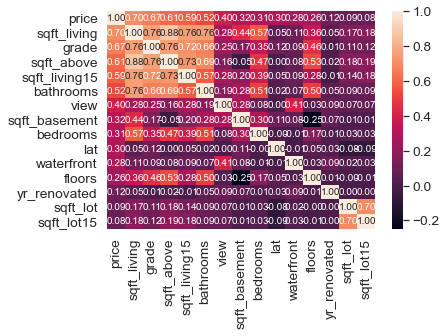

In [167]:
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Turn the price back into its dollar form

In [ ]:
df_train['price'] = np.exp(df_train['price'])

# Modeling

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df_train.drop(columns=['price','coords'])
y = df_train['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [ ]:
X_train.shape

In [ ]:
X_train.dtypes

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

In [ ]:
def get_score(prediction, lables):    
    print('R2 Score: {}'.format(r2_score(prediction, lables)))
    print('RMSE Score: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))
    
    
    
def train_test(estimator, x_train, x_test, y_train, y_test):
    prediction_train = estimator.predict(x_train)
    print('Train')
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_train)
    prediction_test = estimator.predict(x_test)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_test)

In [ ]:
from sklearn import ensemble, tree, linear_model
ENSTest = linear_model.ElasticNetCV(
    alphas=[0.0001, 0.0005, 0.001,
            0.01, 0.1, 1, 10], l1_ratio=[.01,
                                         .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)

In [ ]:
train_test(ENSTest, X_train, X_test, y_train, y_test)

In [ ]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)

train_test(GBest, X_train, X_test, y_train, y_test)